In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("housing.csv")
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
import matplotlib.pyplot as plt

In [8]:
# df.hist(bins=50,figsize = (12,8))   #makes histograms of all feature seperately

In [9]:
import numpy as np

In [10]:
def shuffle_and_split(data, test_ratio):
    np.random.seed(42)   #42 is a convention that freezes the random data so every time we get the same train and test data
    shuffled_indices = np.random.permutation(len(data))   #returns shuffled indices, however this approach will produce random indices for every run
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train, test = shuffle_and_split(df,0.4)

In [12]:
train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9012     -118.63     34.11                35.0       3795.0           690.0   
2769     -115.98     33.32                 8.0        240.0            46.0   
1953     -120.78     38.74                28.0       4236.0           877.0   
16897    -122.37     37.58                43.0       2506.0           432.0   
17866    -121.92     37.45                10.0       3937.0          1054.0   

       population  households  median_income  median_house_value  \
9012       1521.0       653.0         5.8735            448100.0   
2769         63.0        24.0         1.4688             53800.0   
1953       2008.0       881.0         2.1603            111300.0   
16897       967.0       428.0         4.7404            500001.0   
17866      2032.0      1002.0         3.2617            252200.0   

      ocean_proximity  
9012        <1H OCEAN  
2769           INLAND  
1953           INLAND  
16897      NEAR OCEAN  
17866       <1H OCEAN

In [13]:
test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -119.01     36.06                25.0       1505.0             NaN   
3024     -119.46     35.14                30.0       2943.0             NaN   
15663    -122.44     37.80                52.0       3830.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   
9814     -121.93     36.62                34.0       2351.0             NaN   

       population  households  median_income  median_house_value  \
20046      1392.0       359.0         1.6812             47700.0   
3024       1565.0       584.0         2.5313             45800.0   
15663      1310.0       963.0         3.4801            500001.0   
20484      1705.0       495.0         5.7376            218600.0   
9814       1063.0       428.0         3.7250            278000.0   

      ocean_proximity  
20046          INLAND  
3024           INLAND  
15663        NEAR BAY  
20484       <1H OCEAN  
9814       NEAR OCEAN

#### To ensure that important characteristics of the population are well represented in both the training and test sets, we use stratified sampling.

#### A strata is a subgroup of the data defined by a specific attribute. Stratified sampling ensures that each of these subgroups is proportionally represented.

In [14]:
df['income_cat'] = pd.cut(df['median_income'], bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1,2,3,4,5])

In [15]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  income_cat  
0          5  
1          5  
2          5  
3          4  
4          3

Text(0.5, 0, 'Income Category')

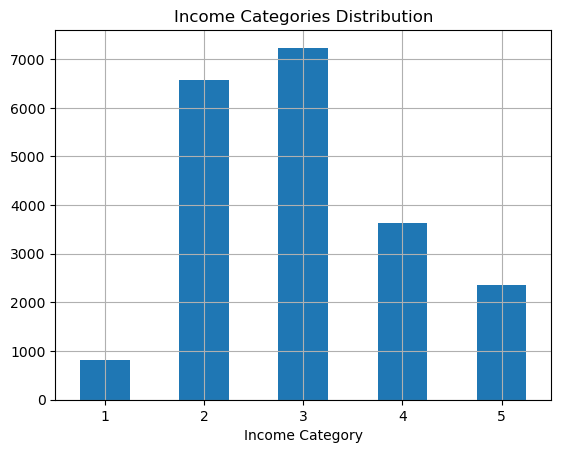

In [17]:
df['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.title("Income Categories Distribution")
plt.xlabel("Income Category")

### We will divide the traning and testing set based on Income Category such that both the sets represent fair division of all income categories

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

In [22]:
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [26]:
strat_train_set.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
1481     -122.04     37.96                28.0       1207.0           252.0   
18125    -122.03     37.33                23.0       4221.0           671.0   
5830     -118.31     34.20                36.0       1692.0           263.0   
17989    -121.95     37.27                17.0       1330.0           271.0   
4861     -118.28     34.02                29.0        515.0           229.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   
1481        724.0       252.0         3.6964            165700.0   
18125      1782.0       641.0         7.4863            412300.0   
5830        778.0       278.0         5.0865            349600.0   
17989       408.0       258.0         1.7171            181300.0   
4861       2690.0       217.0         0.4999            500001.0   

      ocean_proximity income_cat  
12655          INLAND          2  
15502      NEAR OCEAN          5  
2908           INLAND          2  
14053      NEAR OCEAN          2  
20496       <1H OCEAN          3  
1481         NEAR BAY          3  
18125       <1H OCEAN          5  
5830        <1H OCEAN          4  
17989       <1H OCEAN          2  
4861        <1H OCEAN          1

In [27]:
strat_test_set.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
17352    -120.42     34.89                24.0       2020.0           307.0   
3505     -118.45     34.25                36.0       1453.0           270.0   
7777     -118.10     33.91                35.0       1653.0           325.0   
14155    -117.07     32.77                38.0       3779.0           614.0   
7057     -118.04     33.93                35.0       1805.0           387.0   
33       -122.27     37.83                49.0       1655.0           366.0   
17049    -122.26     37.46                26.0       5067.0           750.0   
18164    -122.03     37.36                16.0       2697.0           803.0   
10444    -117.61     33.43                24.0       2303.0           399.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
17352       855.0       283.0         5.0099            162500.0   
3505        808.0       275.0         4.3839            204600.0   
7777       1072.0       301.0         3.2708            159700.0   
14155      1495.0       614.0         4.3529            184000.0   
7057       1505.0       366.0         4.1667            151900.0   
33          754.0       329.0         1.3750            104900.0   
17049      1996.0       728.0         7.0001            500001.0   
18164      1369.0       723.0         4.4699            367400.0   
10444       851.0       379.0         3.9875            346500.0   

      ocean_proximity income_cat  
5241        <1H OCEAN          5  
17352       <1H OCEAN          4  
3505        <1H OCEAN          3  
7777        <1H OCEAN          3  
14155      NEAR OCEAN          3  
7057        <1H OCEAN          3  
33           NEAR BAY          1  
17049      NEAR OCEAN          5  
18164       <1H OCEAN          3  
10444      NEAR OCEAN          3

#### plotting and checking spread of income categories across both data

Text(0.5, 0, 'Income Category')

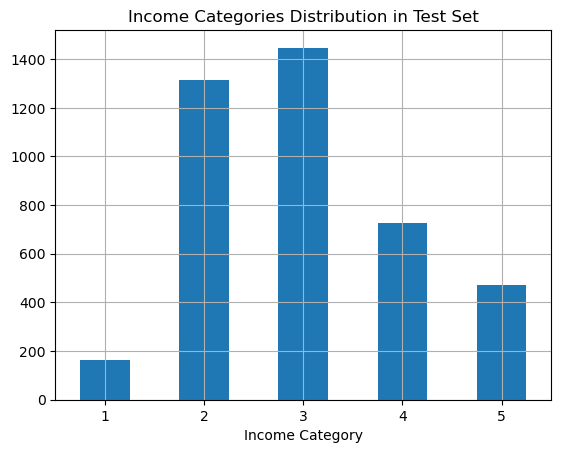

In [28]:
strat_test_set['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.title("Income Categories Distribution in Test Set")
plt.xlabel("Income Category")

Text(0.5, 0, 'Income Category')

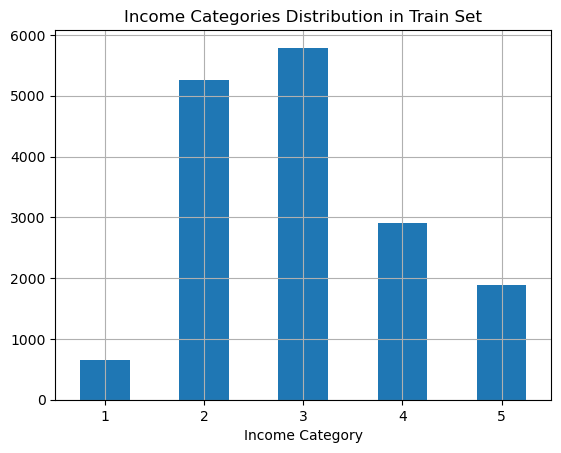

In [29]:
strat_train_set['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.title("Income Categories Distribution in Train Set")
plt.xlabel("Income Category")

### Thus, both the sets have normally distributed data of income and thus it is a proper representative of the population